# Project 2: Data Analysis Using ML Techniques
# Boston Housing Prices Dataset (A Regression Problem)
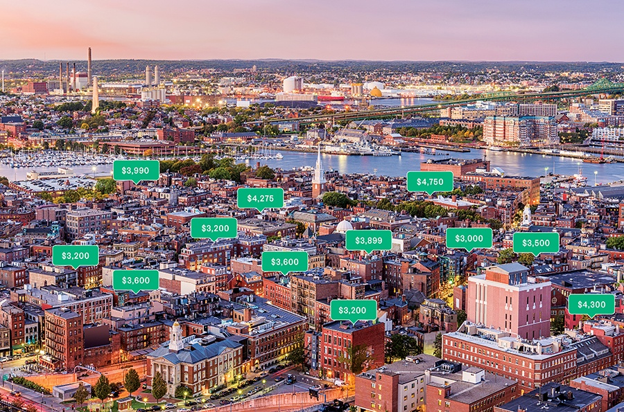

#0 Preliminary Actions

In [ ]:
cd drive/MyDrive

[Errno 2] No such file or directory: 'drive/MyDrive'
/content


In [ ]:
#Garbage collection
import gc
gc.collect()

23

Importing libraries



In [ ]:
import pandas as pd #general data handling
import numpy as np        #    "
from imblearn.over_sampling import SMOTE #for balancing the dataset
import matplotlib.pyplot as plt #for plotting the data
import seaborn as sns #for boxplot to detect outliers
from scipy.stats import iqr #to detect outliers
from sklearn.impute import SimpleImputer # to impute missing values
from sklearn import preprocessing #for data normalization and scaling
from sklearn.feature_selection import SelectPercentile
from sklearn.decomposition import PCA #for PCA feature selection
from sklearn.tree import DecisionTreeRegressor #for Decision Tree feature selection
from sklearn.feature_selection import RFECV, SelectFromModel, RFE, SelectKBest, f_regression #for Univariate, KBest and RFE, Decision Tree feature selection
from sklearn.model_selection import train_test_split #Train test and split method to train models
from sklearn.metrics import mean_squared_error #For performance comparsion of feature selection methods
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR#For Support Vector
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #For Calculation of MSE nad R-Square
from sklearn.model_selection import GridSearchCV #For Grid Search
from sklearn.ensemble import RandomForestRegressor  #For Random Forest Regressor
from sklearn.model_selection import cross_val_score #for cross validation score
import seaborn as sns #scattered plots
import matplotlib.pyplot as plt #for graph
from sklearn.preprocessing import PolynomialFeatures # for polynomial lines on scattered plot
from sklearn.pipeline import make_pipeline

#1. Data Visualization

##1.1 Tabular Visualization

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/data.csv", delimiter=',')
print (dataset.shape)
dataset.info()
dataset.describe()
#dataset.head(5)


(511, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,511.000000,511.000000,511.000000,511.000000,511.000000,506.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,3.584139,11.252446,11.151096,0.068493,0.554757,6.287589,68.616243,3.783876,9.485323,407.440313,18.500000,356.600900,12.879550,22.682192
std,8.564433,23.234838,6.828175,0.252838,0.115310,0.703802,28.099130,2.098631,8.688469,167.903532,2.200348,90.882679,7.797416,9.484262
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082325,0.000000,5.190000,0.000000,0.449000,5.885500,45.050000,2.100350,4.000000,279.500000,17.400000,374.710000,7.065000,17.050000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.209000,77.300000,3.152300,5.000000,330.000000,19.100000,391.340000,11.450000,21.200000
75%,3.621175,12.500000,18.100000,0.000000,0.624000,6.629750,94.050000,5.118000,24.000000,666.000000,20.200000,396.210000,17.105000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000,67.000000


## 1.2 Graphical Visualization

Histogram Analysis

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

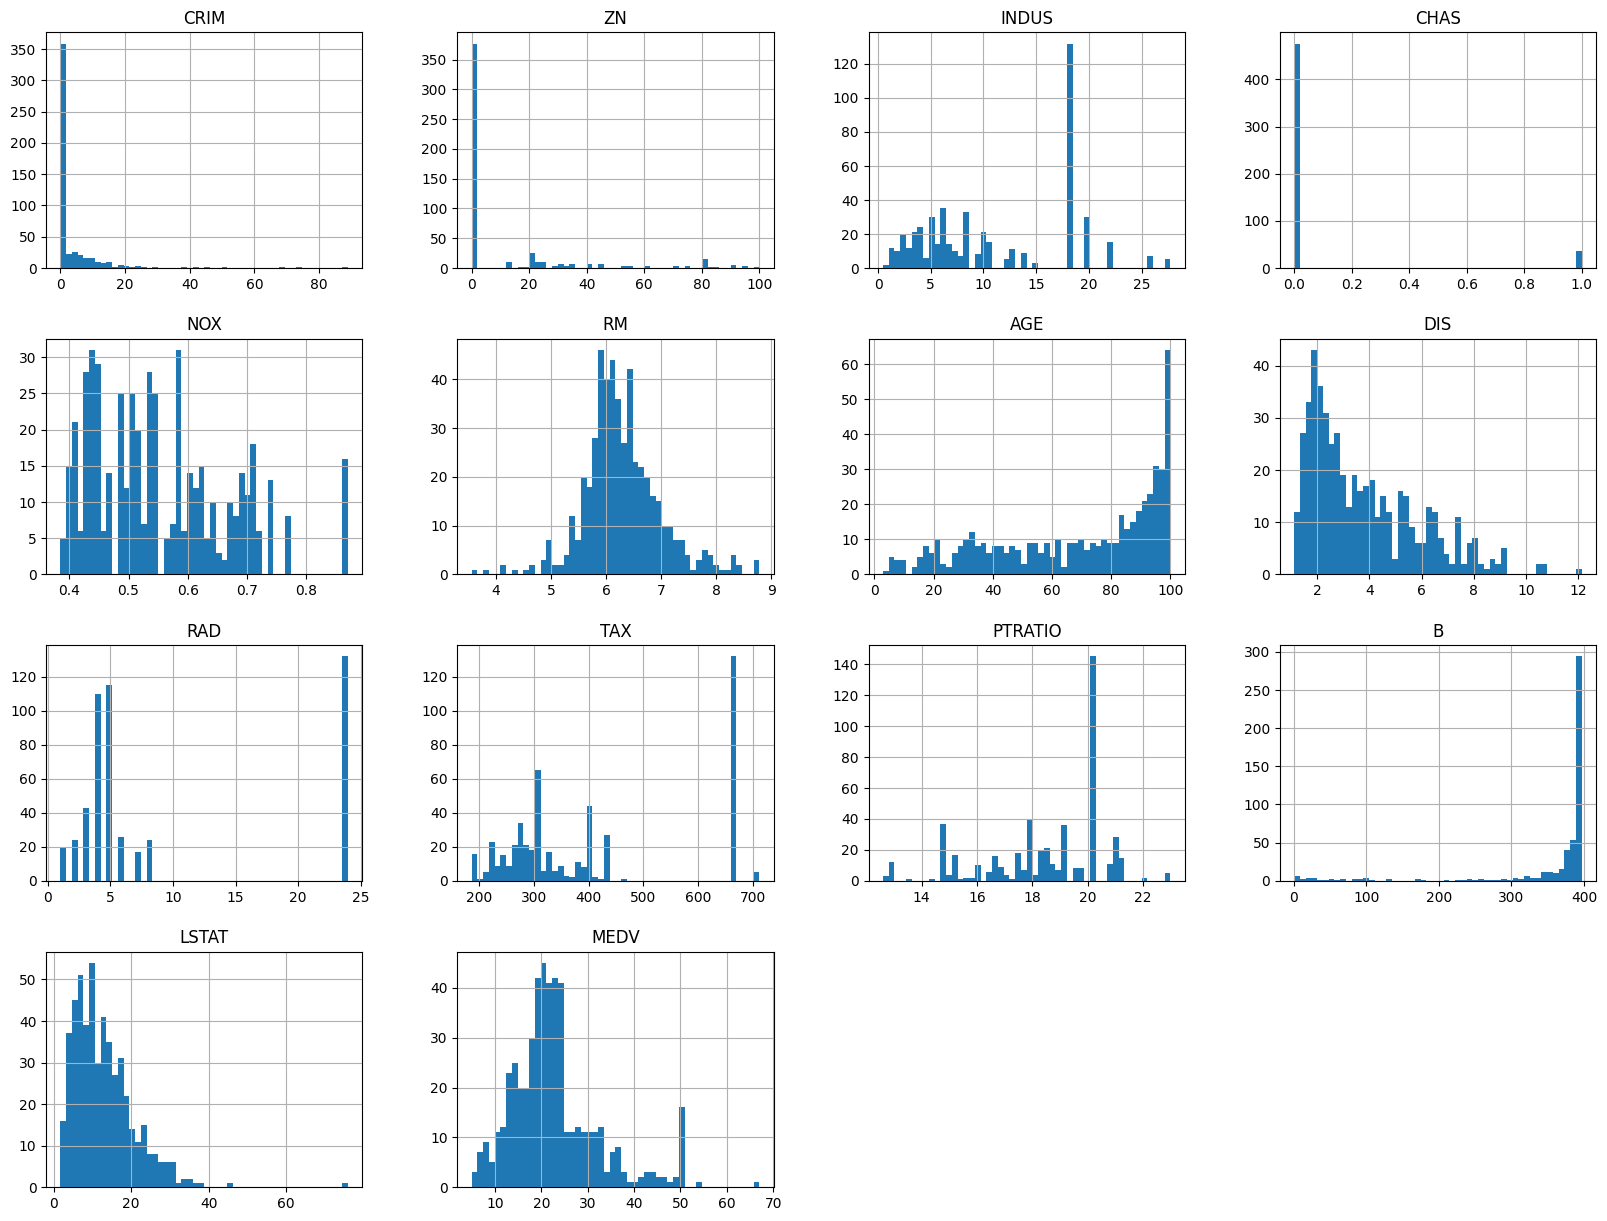

In [ ]:
dataset.hist(bins=50, figsize=(20, 15))

Bar Graph for data distribution

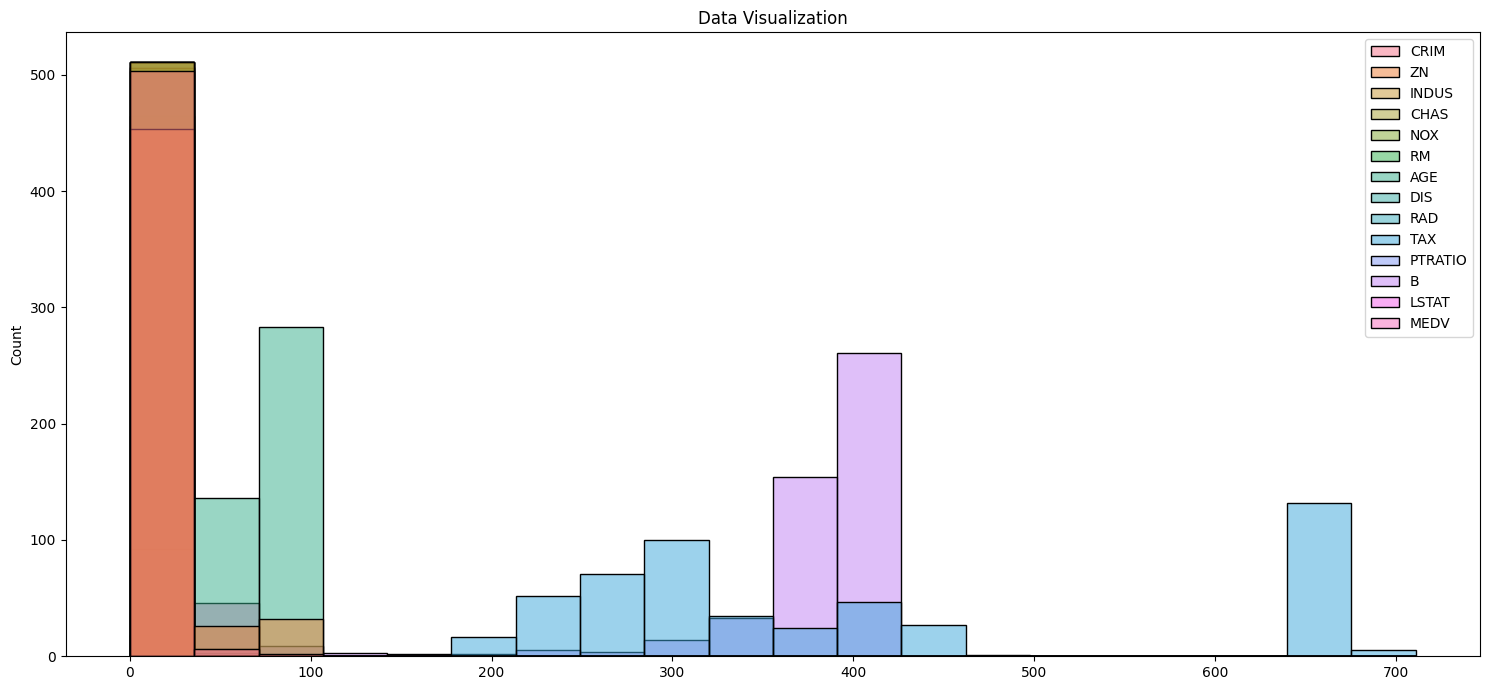

In [ ]:
plt.figure(figsize=(15, 7))
sns.histplot(dataset, bins=20)
plt.title('Data Visualization')
plt.tight_layout()
plt.show()

#2. Data Pre-Processing

##2.1 Handling Imbalances in the Dataset

'MEDV' feature is the target feature. Since, our dataset has regression problem and there are continuous values in the dataset, so, data balacing is not being carried out.

##2.2 Feature Encoding
Since, the dataset has no non-numeric/ categorical values and a regression problem, thus, no feature encoding is required.

## 2.3 Handling the Missing Values in Dataset

2.3.1 Find missing vales in dataset

In [ ]:
print (dataset.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


**2.3.2 Method 1: Remove missing values**

In [ ]:
print (dataset.shape)
dataset0 = dataset.dropna()
print (dataset0.shape)

(511, 14)
(506, 14)


**After removal of 5 rows containing null values, the dataset has been reduced to 506 rows.**

**2.3.2 Method 2: Imputing missing values using SimpleImputer() method**

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Assuming dataset is a Pandas DataFrame
imputer = SimpleImputer(strategy='mean')
dataseti = imputer.fit_transform(dataset)  # Output is a NumPy array

# Convert the NumPy array to a Pandas DataFrame
dataset1 = pd.DataFrame(dataseti, columns=dataset.columns)

# Print the count of null values for each column
print(dataset1.isnull().sum())
print(dataset1.shape)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
(511, 14)


**Since, data is important even in those rows containig missing values, thus,  such missing values have been filled with data instead of dropping out in the Dataframe 'dataset1'. Thus, the same will be used in future calculations below.**

##2.4 Outliers Detection and Removal

2.4.0 A MSE calculation method to weigh performace of a model

In [ ]:
def mse(data):
  X = data.drop('MEDV', axis=1)
  y = data['MEDV']
  # Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  # Build and evaluate the model
  model = LinearRegression()
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  mse = mean_squared_error(y_test, predictions).round(2)
  return mse

###**2.4.1 Detection of Outliers**

<Axes: xlabel='Feature', ylabel='Value'>

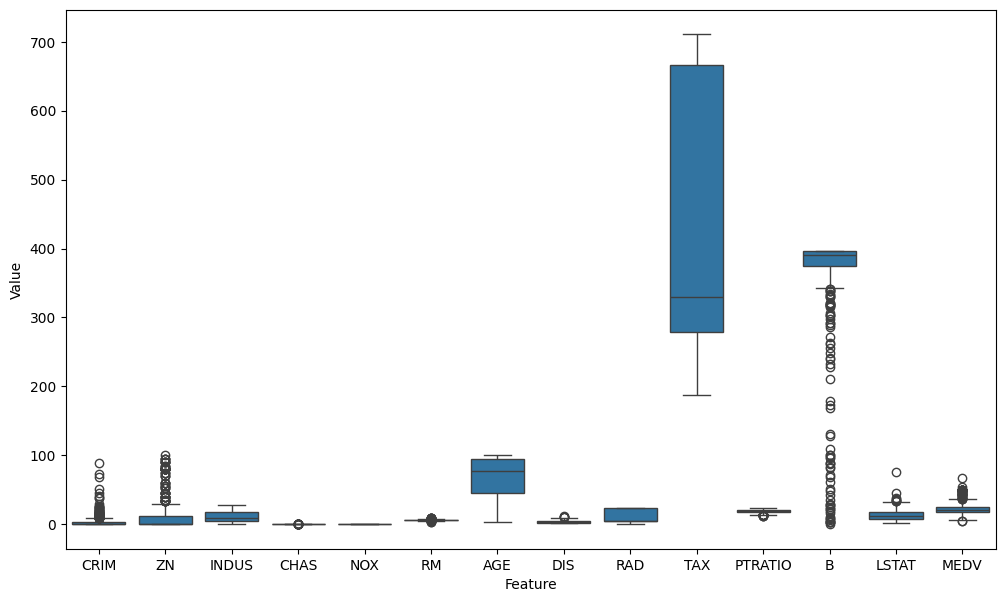

In [ ]:
# Reshape the DataFrame using melt
melted_data = pd.melt(dataset1, var_name="Feature", value_name="Value")

# Use boxplot with Seaborn
plt.figure(figsize=(12, 7))
sns.boxplot(x="Feature", y="Value", data=melted_data)

### **2.4.2 Outliers Removal - IQR (Interquartile Range) Method**

Mean Squared Error before outlier removal: 71.22
Mean Squared Error after outlier removal: 8.28
Difference of MSE after the process: 62.94


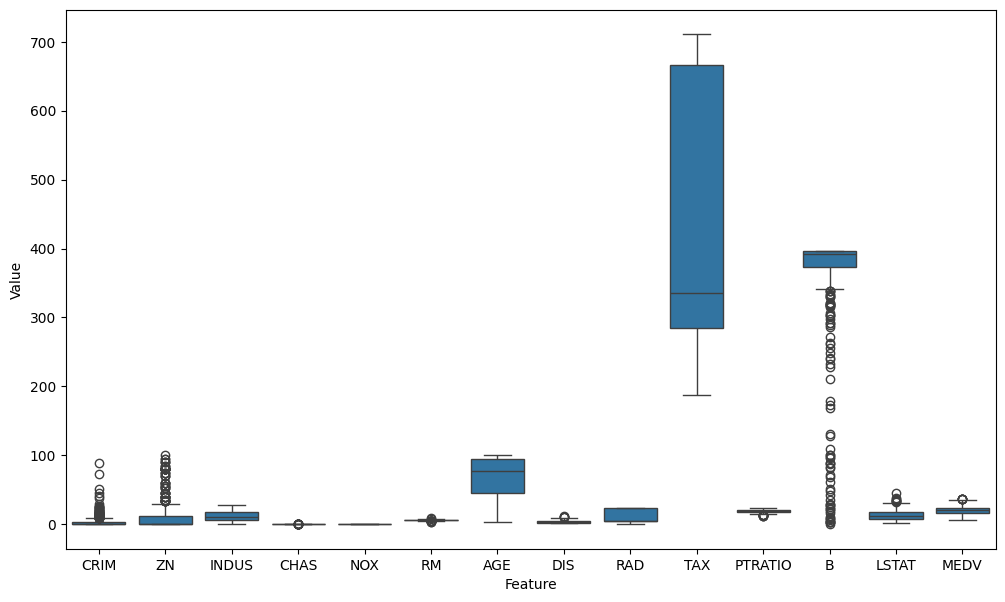

In [ ]:
for feature in dataset1.columns:
  # Calculate IQR
  iqr_value = (iqr(dataset1[feature]))
  # Calculate Q1 and Q3
  Q1 = dataset1[feature].quantile(0.25)
  Q3 = dataset1[feature].quantile(0.75)
  # Define threshold for outliers
  threshold = 1.5 * iqr_value
  # Identify outliers
  outliers = dataset1[feature][(dataset1[feature] < (Q1-threshold)) | (dataset1[feature] > (Q3+threshold))]
  # Remove outliers
  outlier_data = dataset1.drop(outliers.index)

# Visualize distribution after removing outliers
plt.figure(figsize=(12, 7))
melted = pd.melt(outlier_data, var_name="Feature", value_name="Value")
sns.boxplot(x="Feature", y="Value", data=melted)

#Checking impacts

print("Mean Squared Error before outlier removal:", mse(dataset1))

print("Mean Squared Error after outlier removal:", mse(outlier_data))

print("Difference of MSE after the process:",(mse(dataset1)-mse(outlier_data)))

This shows a huge reduction in error i.e. 62.94

### **2.4.3 Outliers Removal - Z Score Method**

In [ ]:
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

z_scores = stats.zscore(dataset1.drop('MEDV', axis=1))
outliers = (np.abs(z_scores) > 3).any(axis=1)
zdata = dataset1[~outliers]

print("Mean Squared Error before outlier removal:", mse(dataset1))
print("Mean Squared Error after outlier removal using Z-Score:", mse(zdata))
print("Difference of MSE after the process:", (mse(dataset1) - mse(zdata)).round(2))

Mean Squared Error before outlier removal: 71.22
Mean Squared Error after outlier removal using Z-Score: 20.48
Difference of MSE after the process: 50.74


**The comparison of IQR vs Z-Score reflects that IQR has out-performed the Z-Score method in removing outliers. Thus, the dataframe acquired after IQR process (i.e. outlier_data) will be used in the next steps.**

##2.5 Feature selection

##2.5.0 Feature Importance and Correlation Analysis

## This analysis helps out in feature selection by identifying the most important and least important features wrt the target feature.

LSTAT :  56.08 %
RM :  20.0 %
CRIM :  5.96 %
DIS :  4.08 %
AGE :  2.58 %
NOX :  2.56 %
TAX :  2.52 %
PTRATIO :  2.31 %
B :  1.7 %
INDUS :  1.52 %
RAD :  0.43 %
ZN :  0.17 %
CHAS :  0.09 %


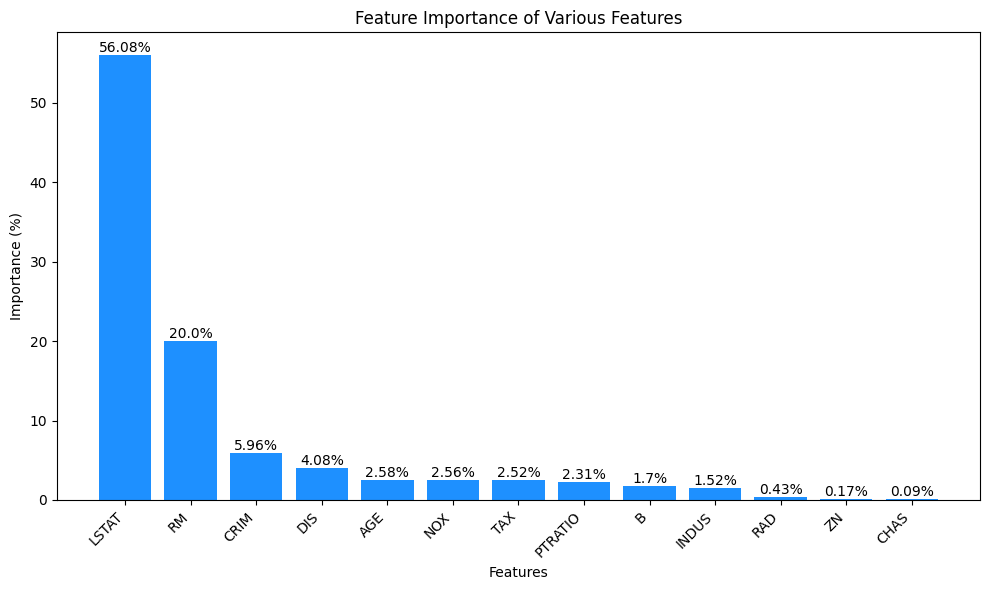

In [ ]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, feature_importances))
sorted_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Extracting values for plotting
features, importances = zip(*sorted_importance)


# Convert importances to percentages
importances_percentage = [importance * 100 for importance in importances]

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(features, importances_percentage, color='dodgerblue')

# Adding values at the top of each bar
for x, importance_percentage in zip(features, importances_percentage):
    print(x,": ", round(importance_percentage, 2),"%")
    plt.text(x, importance_percentage, f"{round(importance_percentage, 2)}%", ha='center', va= 'bottom', color='black')

plt.xlabel('Features')
plt.ylabel('Importance (%)')
plt.title('Feature Importance of Various Features')
plt.xticks(rotation=45, ha='right')  # Adjusted x-axis labels for better readability
plt.tight_layout()
plt.show()

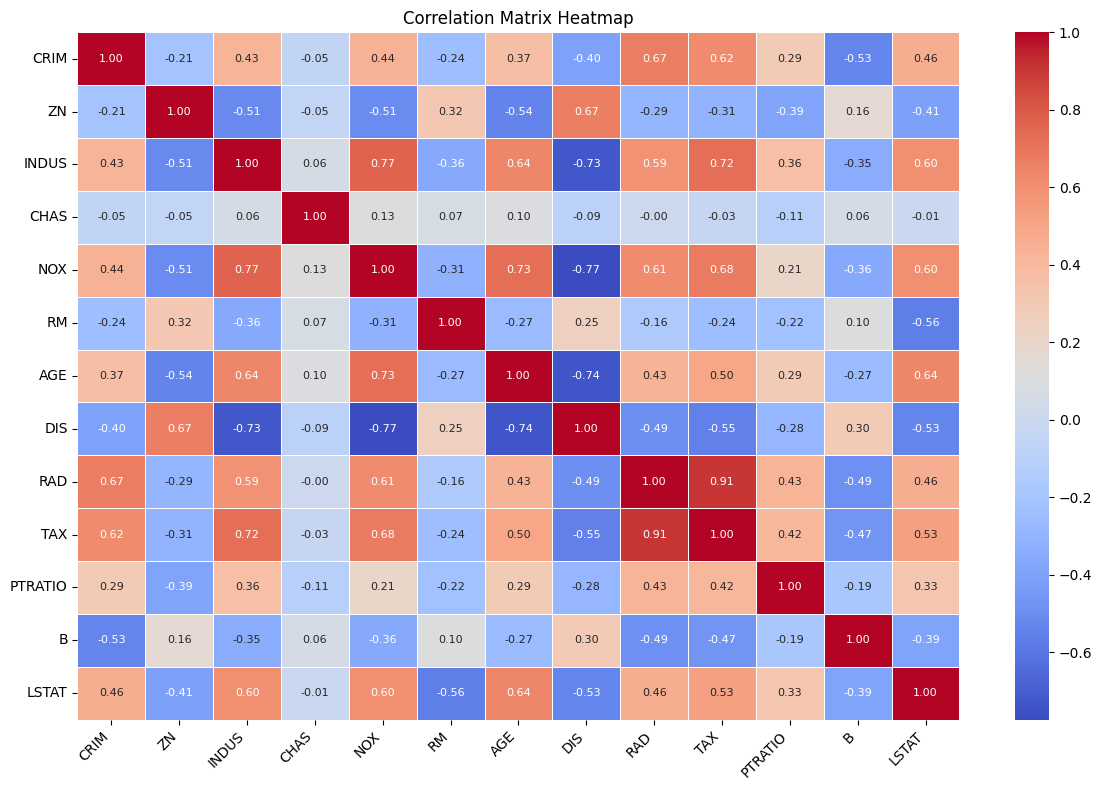

In [ ]:
correlation_matrix = X_train.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            linewidths=0.5, annot_kws={"size": 8})

plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

### **Preparing scatter plots for analysis of the relationship strength between each feature and the target feature (MEDV)**
### **Note:** The number of fetures required for scatter plotting can be defined in the first line of code inside square brackets []. CUrrently, the top four features w.r.t their feature importance in a descending order) have been selected for plotting.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


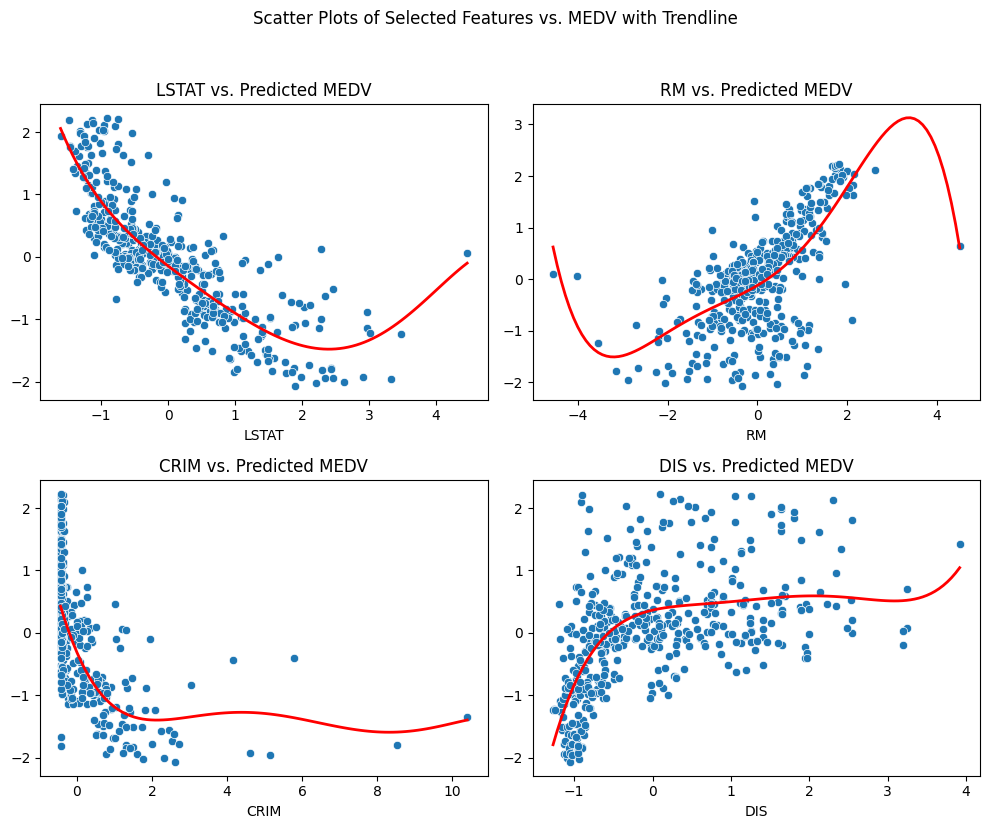

In [ ]:
# Select a the range of features required to be shown in scatter plots. Top 4 features w.r.t feature importance have been selected here.
selected_features = features[:4]

# Set up subplots in a 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
fig.suptitle('Scatter Plots of Selected Features vs. MEDV with Trendline', y=1.03)

# Create scatter plots with polynomial trendline
for i, feature in enumerate(selected_features):
    row, col = divmod(i, 2)  # Calculate row and column indices for the subplot
    predictions = rf_optimal.predict(X)  # Predict using the trained model
    sns.scatterplot(x=X[feature], y=predictions, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} vs. Predicted MEDV')

    # Fit a polynomial regression model to the data
    degree = 5
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X[[feature]], predictions)

    # Generate x values for the trendline
    x_values = np.linspace(X[feature].min(), X[feature].max(), 100).reshape(-1, 1)

    # Predict y values using the polynomial regression model
    y_values = model.predict(x_values)

    # Plot the trendline
    axes[row, col].plot(x_values, y_values, color='red', linewidth=2)

plt.tight_layout()
plt.show()


2.5.1.1
A method to calculate MSE for each model for its evaluation

In [ ]:
def evaluate_model(X, y, model):
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return mse, r2

2.5.1.2 Splitting the dataset into descriptive and target features

In [ ]:
X = outlier_data.drop('MEDV', axis=1)
y = outlier_data['MEDV']

2.5.2 Univariate feature selection

In [ ]:
X_uni = SelectKBest(f_regression, k=5).fit_transform(X, y)
mse_uni, r2_uni = evaluate_model(X_uni, y, LinearRegression())
print("MSE for Univariate:", mse_uni.round(3))
print("R-Squared for Univariate:", r2_uni.round(3))

MSE for Univariate: 14.71
R-Squared for Univariate: 0.647


2.5.3 PCA feature selection

In [ ]:
X_pca = PCA(n_components=5).fit_transform(X)
mse_pca, r2_pca = evaluate_model(X_pca, y, LinearRegression())
print("MSE for PCA:", mse_pca.round(3))
print("R-Squared for PCA:", r2_pca.round(3))

MSE for PCA: 20.813
R-Squared for PCA: 0.501


2.5.4 RFE (Recursive Feature Elimination):

In [ ]:
X_rfe = RFE(estimator=LinearRegression(), n_features_to_select=5).fit_transform(X, y)
mse_rfe, r2_rfe = evaluate_model(X_rfe, y, LinearRegression())
print("MSE for RFE:", mse_rfe.round(3))
print("R2 for RFE:", r2_rfe.round(3))

MSE for RFE: 16.613
R2 for RFE: 0.602


2.5.5 Tree based feature selection

In [ ]:
X_tree = SelectFromModel(DecisionTreeRegressor(random_state=0)).fit_transform(X, y)
mse_tree, r2_tree = evaluate_model(X_tree, y, LinearRegression())
print("MSE for Tree-Based:", mse_tree.round(3))
print("R2 for Tree-Based:", r2_tree.round(3))

MSE for Tree-Based: 16.318
R2 for Tree-Based: 0.609


2.5.6 RFECV Selection

In [ ]:
# RFECV
estimator = LinearRegression()
rfecv = RFECV(estimator, step=1, cv=5, scoring='neg_mean_squared_error')
X_rfecv = rfecv.fit_transform(X, y)
mse_rfecv,r2_rfecv = evaluate_model(X_rfecv, y, LinearRegression())
print("MSE for RFECV:", mse_rfe.round(3))
print("R2 for RFECV:", r2_rfecv.round(3))


MSE for RFECV: 16.613
R2 for RFECV: 0.703


2.5.7 Comparison of feature selection methods on MSE basis

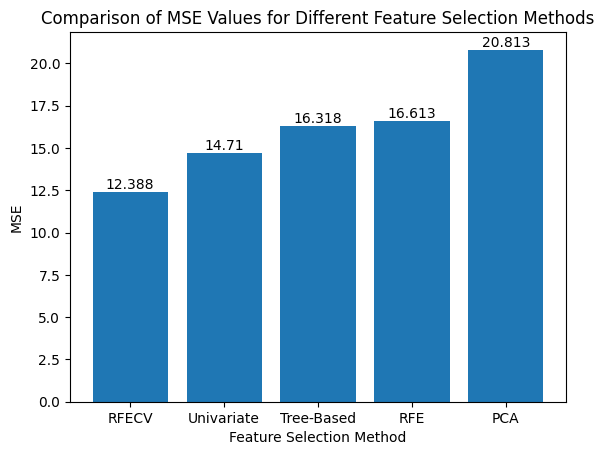

In [ ]:
# Create a bar chart
methods = ["Univariate","PCA", "RFE", "Tree-Based", "RFECV"]
mse_values = [mse_uni,mse_pca, mse_rfe, mse_tree, mse_rfecv]
mlist = list(sorted(zip(methods, mse_values), key=lambda x: x[1]))
keys, values = zip(*mlist)
plt.bar(keys, values)
plt.xlabel("Feature Selection Method")
plt.ylabel("MSE")
plt.title("Comparison of MSE Values for Different Feature Selection Methods")
for key, value in mlist:
  plt.text(key, value,str(round(value, 3)), ha='center', va='bottom')
plt.show()

##2.6 Data Scaling

2.6.1 MinMax Scaler Method

In [ ]:
scalingObj = preprocessing.MinMaxScaler()
new = scalingObj.fit_transform(outlier_data)
print(new.shape) #to get shape of numpy array named 'new'
minMax = pd.DataFrame(new, columns=outlier_data.columns)

(469, 14)


In [ ]:
#dataset2.hist(bins=50, figsize=(20, 15))

2.6.2 Data Scaling - Standard Scaler Method

In [ ]:
scaler = preprocessing.StandardScaler()
newX = scaler.fit_transform(outlier_data)
std_scaler = pd.DataFrame(newX, columns=outlier_data.columns)
#scaled_data.hist(bins=50, figsize=(20, 15))
print(std_scaler.shape)

(469, 14)


**Observation: This shows that both methods scaled down the datast to 469 rows from 511.**

Plotting data for both of the scaling methds

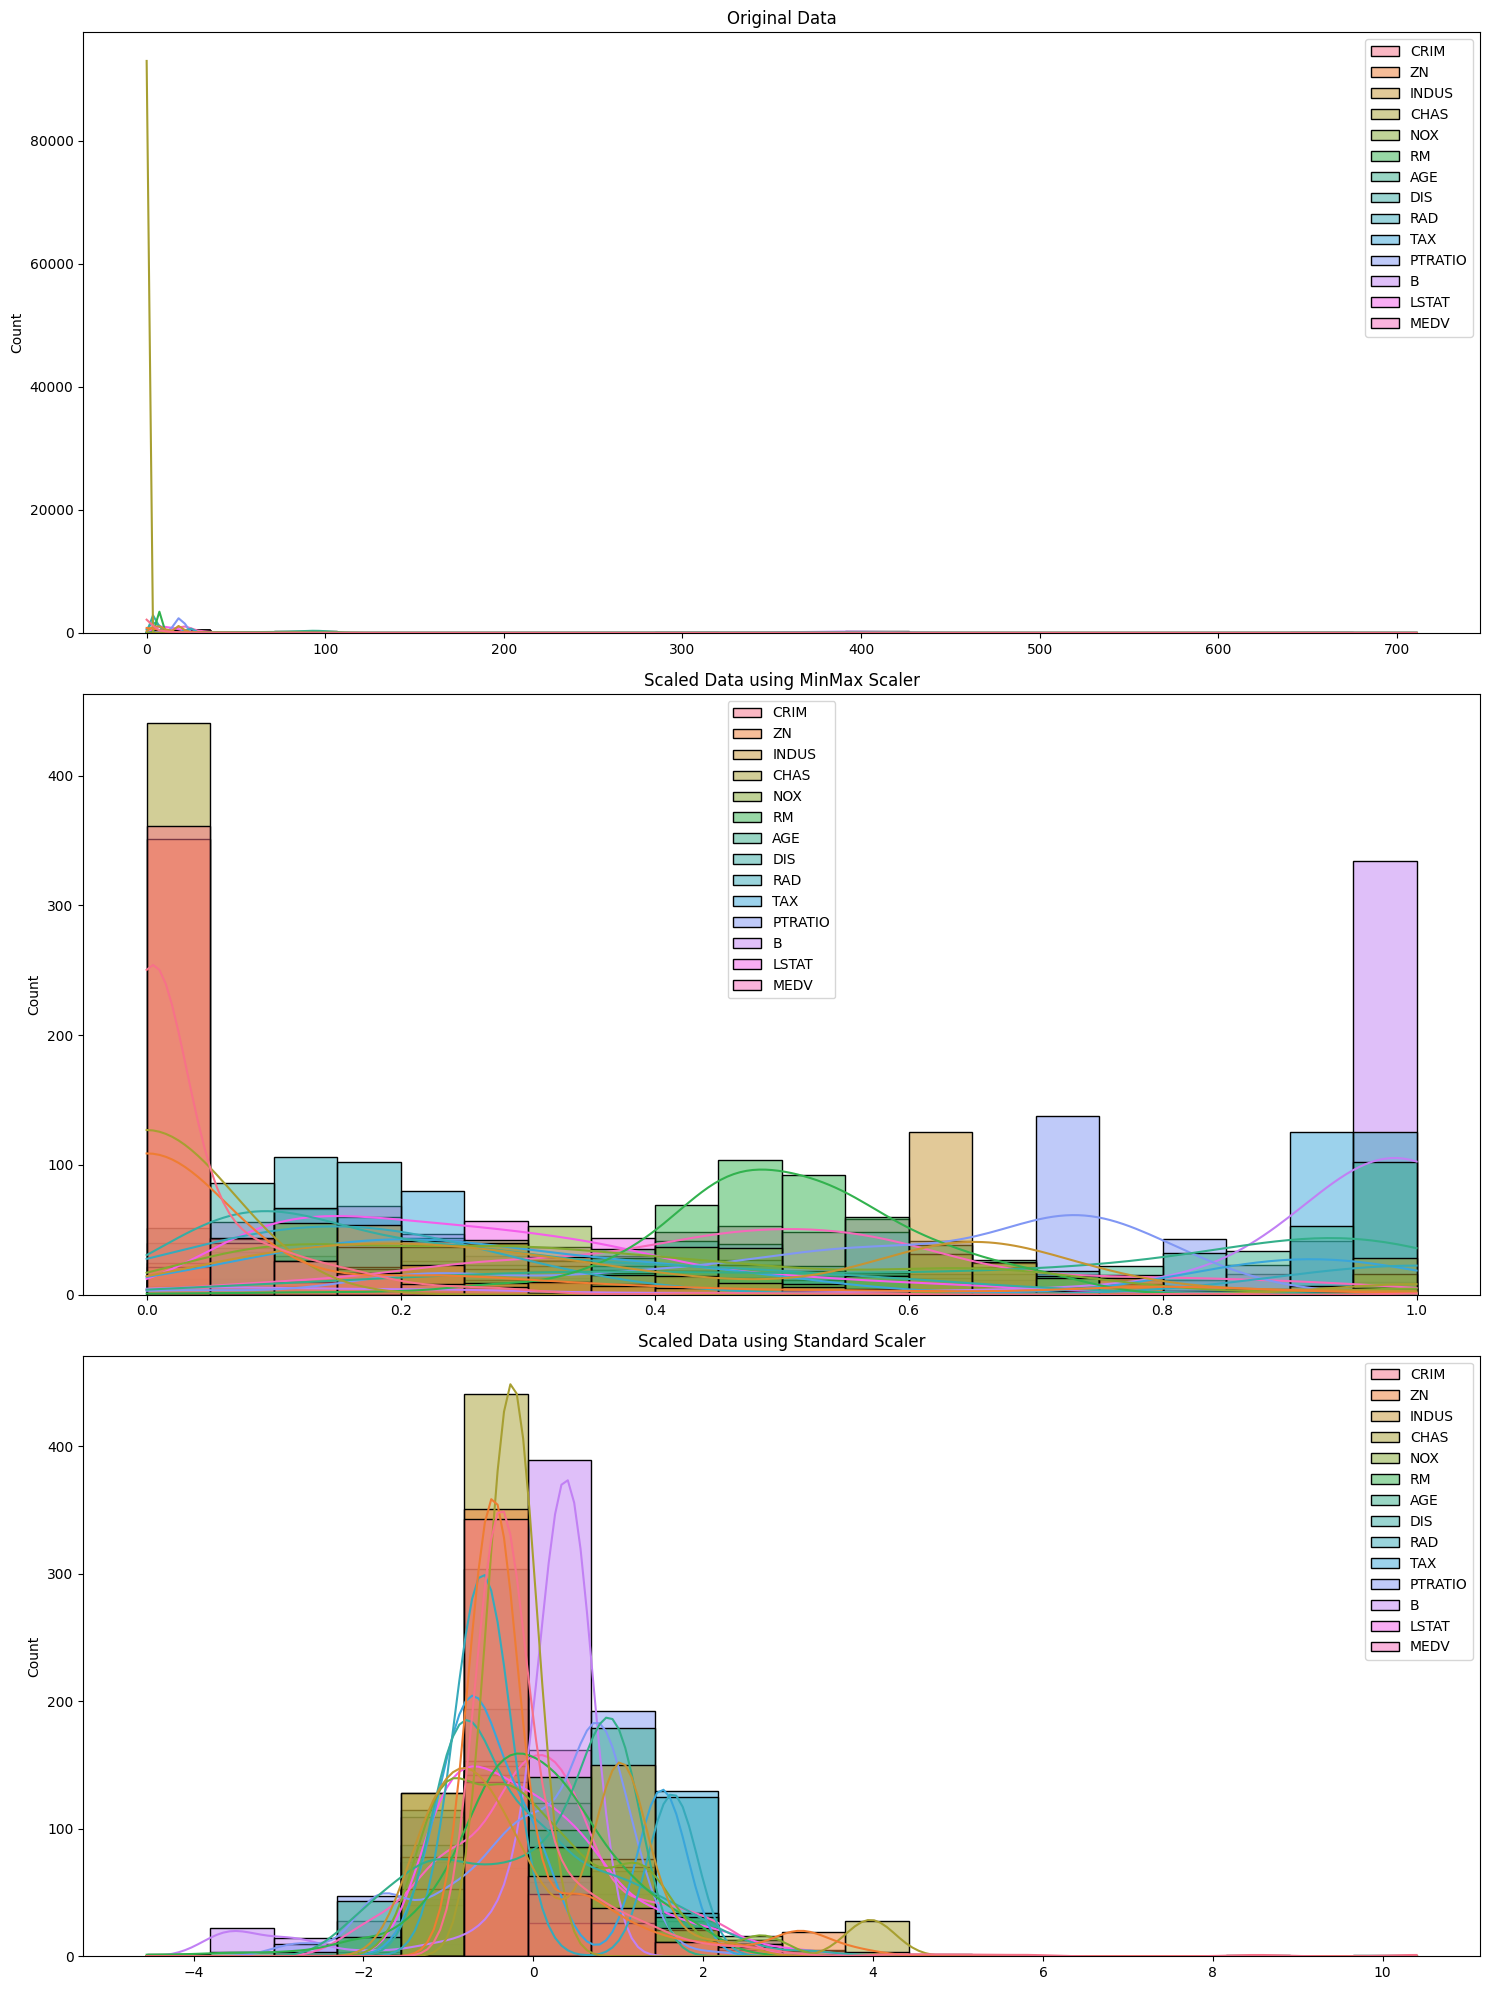

In [ ]:
# Plot histograms for comparison
plt.figure(figsize=(15, 20))
plt.subplot(3, 1, 1)
sns.histplot(dataset1, bins=20, kde=True) #Kernel Density Estimation KDE is the curve line used to make a better representation of discreet values in a graph.
plt.title('Original Data')
#MinMax Scaler Graph
plt.subplot(3, 1, 2)
sns.histplot(minMax, bins=20, kde=True)
plt.title('Scaled Data using MinMax Scaler')
#Standard Scaler Graph
plt.subplot(3, 1, 3)
sns.histplot(std_scaler, bins=20, kde=True)
plt.title('Scaled Data using Standard Scaler')

plt.tight_layout()
plt.show()

#3. **Application of Regression Algorithms**

Various separate sections for regression models have been merged into one cell for code optimization and comparison.

MSE Value of Linear model:  0.27
MSE Value of Lasso model:  0.91
MSE Value of Ridge model:  0.27
MSE Value of Elastic Net model:  0.7
MSE Value of Decision Tree model:  0.46
MSE Value of Random Forest model:  0.15
MSE Value of Gradient Boosting model:  0.16
MSE Value of Support Vector model:  0.21
R2 Value of Linear model:  0.7
R2 Value of Lasso model:  -0.0
R2 Value of Ridge model:  0.7
R2 Value of Elastic Net model:  0.23
R2 Value of Decision Tree model:  0.5
R2 Value of Random Forest model:  0.84
R2 Value of Gradient Boosting model:  0.83
R2 Value of Support Vector model:  0.77


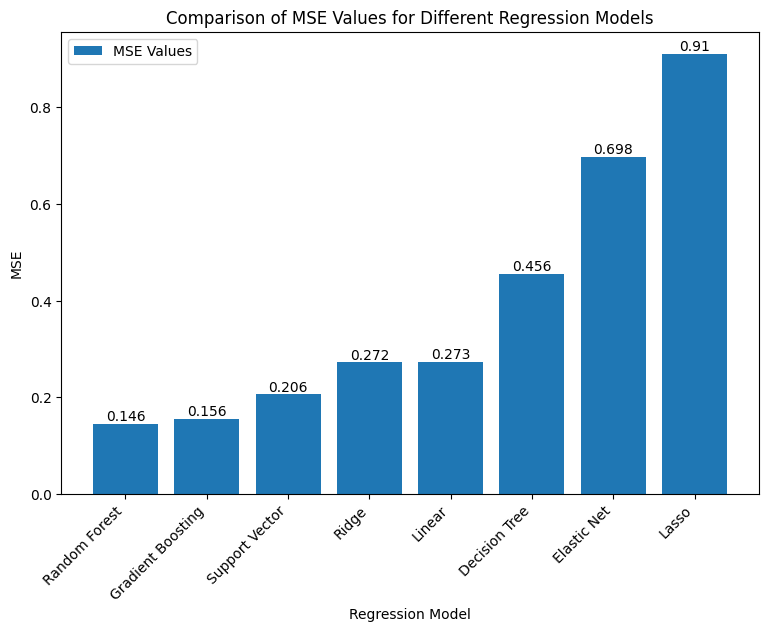

In [ ]:
# Split the data into training and testing sets using scaled dataset named: 'std_scaler'
X = std_scaler.drop('MEDV', axis=1)
y = std_scaler['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the regression models
models = {
    "Linear": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Elastic Net": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector": SVR()
}

# Evaluate each model using MSE, MAE, and R-squared
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    #mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        "MSE": mse,
        #"MAE": mae,
        "R-squared": r2
    }
#Print MSE
[print('MSE Value of', name, 'model: ', results[name]["MSE"].round(2)) for name in models]

# Print R2 values
[print('R2 Value of', name, 'model: ', results[name]["R-squared"].round(2)) for name in models]




# Sort the results by MSE in ascending order
sorted_results = sorted(results.items(), key=lambda x: x[1]["MSE"])
# Extract model names and corresponding MSE values
model_names = [name for name, _ in sorted_results]
mse_values = [result["MSE"] for _, result in sorted_results]
ms = zip(model_names, mse_values)
# Generate a bar chart
plt.figure(figsize=(9, 6))
plt.bar(range(len(model_names)), mse_values, label="MSE Values")
plt.xlabel("Regression Model")
plt.ylabel("MSE")
plt.title("Comparison of MSE Values for Different Regression Models")
plt.xticks(range(len(model_names)), model_names, rotation=45, ha='right')  # Set the tick labels to be model names
for i, value in enumerate(mse_values):
  plt.text(i, value, str(round(value, 3)), ha='center', va='bottom')
plt.legend()
plt.show()

#4. Hyper Parameter Optimization

In [ ]:
#Divide in train test and split parts of data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)


# Define the hyperparameter space to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the RandomForestRegressor model
rf_model = RandomForestRegressor()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(rf_model, param_grid, scoring="neg_mean_squared_error", cv=5)

# Fit the grid search model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Create the optimal RandomForestRegressor model
optimal_rf_model = RandomForestRegressor(**best_params)

# Train the optimal model on the training data
optimal_rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_optimal = optimal_rf_model.predict(X_val)

# Calculate the MSE
mse_optimal = mean_squared_error(y_val, y_pred_optimal)

#R2 Score
r2_score_optimal = r2_score(y_val, y_pred_optimal)

print("Optimal parameters for Random Forest Regressor:", best_params)

print("MSE for optimal RandomForestRegressor:", mse_optimal.round(3))

print("R2 Score:", r2_score_optimal.round(2))

Optimal parameters for Random Forest Regressor: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
MSE for optimal RandomForestRegressor: 0.208
R2 Score: 0.8


#5. Analysis

##5.1 Cross Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create the random forest regressor
rf_optimal = RandomForestRegressor(**best_params)

# Perform 5-fold cross-validation
scores = cross_val_score(rf_optimal, X_train, y_train, cv=5)

# Evaluate the model on the test set
y_pred = rf_optimal.fit(X_train, y_train).predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
print("MSE for test set:", mse_test.round(2))

#R2 Score
r2_score_cv = r2_score(y_test, y_pred)
print("R2 Score:", r2_score_cv.round(2))

# Print the mean and standard deviation of the scores
print("Mean cross-validation score:", np.mean(scores).round(2))
print("Standard deviation of cross-validation score:", np.std(scores).round(2))

MSE for test set: 0.26
R2 Score: 0.75
Mean cross-validation score: 0.8
Standard deviation of cross-validation score: 0.08
